In [1]:
import pandas as pd
import numpy as np
import mne
import pywt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ex_data/rest_zyy_02_EPOCFLEX_179733_2023.03.18T09.43.21+08.00.md.bp.csv", header=1)

In [3]:
ch_info = data.iloc[:, [0] + list(range(4, 36))]

In [4]:
ch_names = ch_info.columns[1:].tolist()

In [5]:
data_c = ch_info.iloc[:,1:]

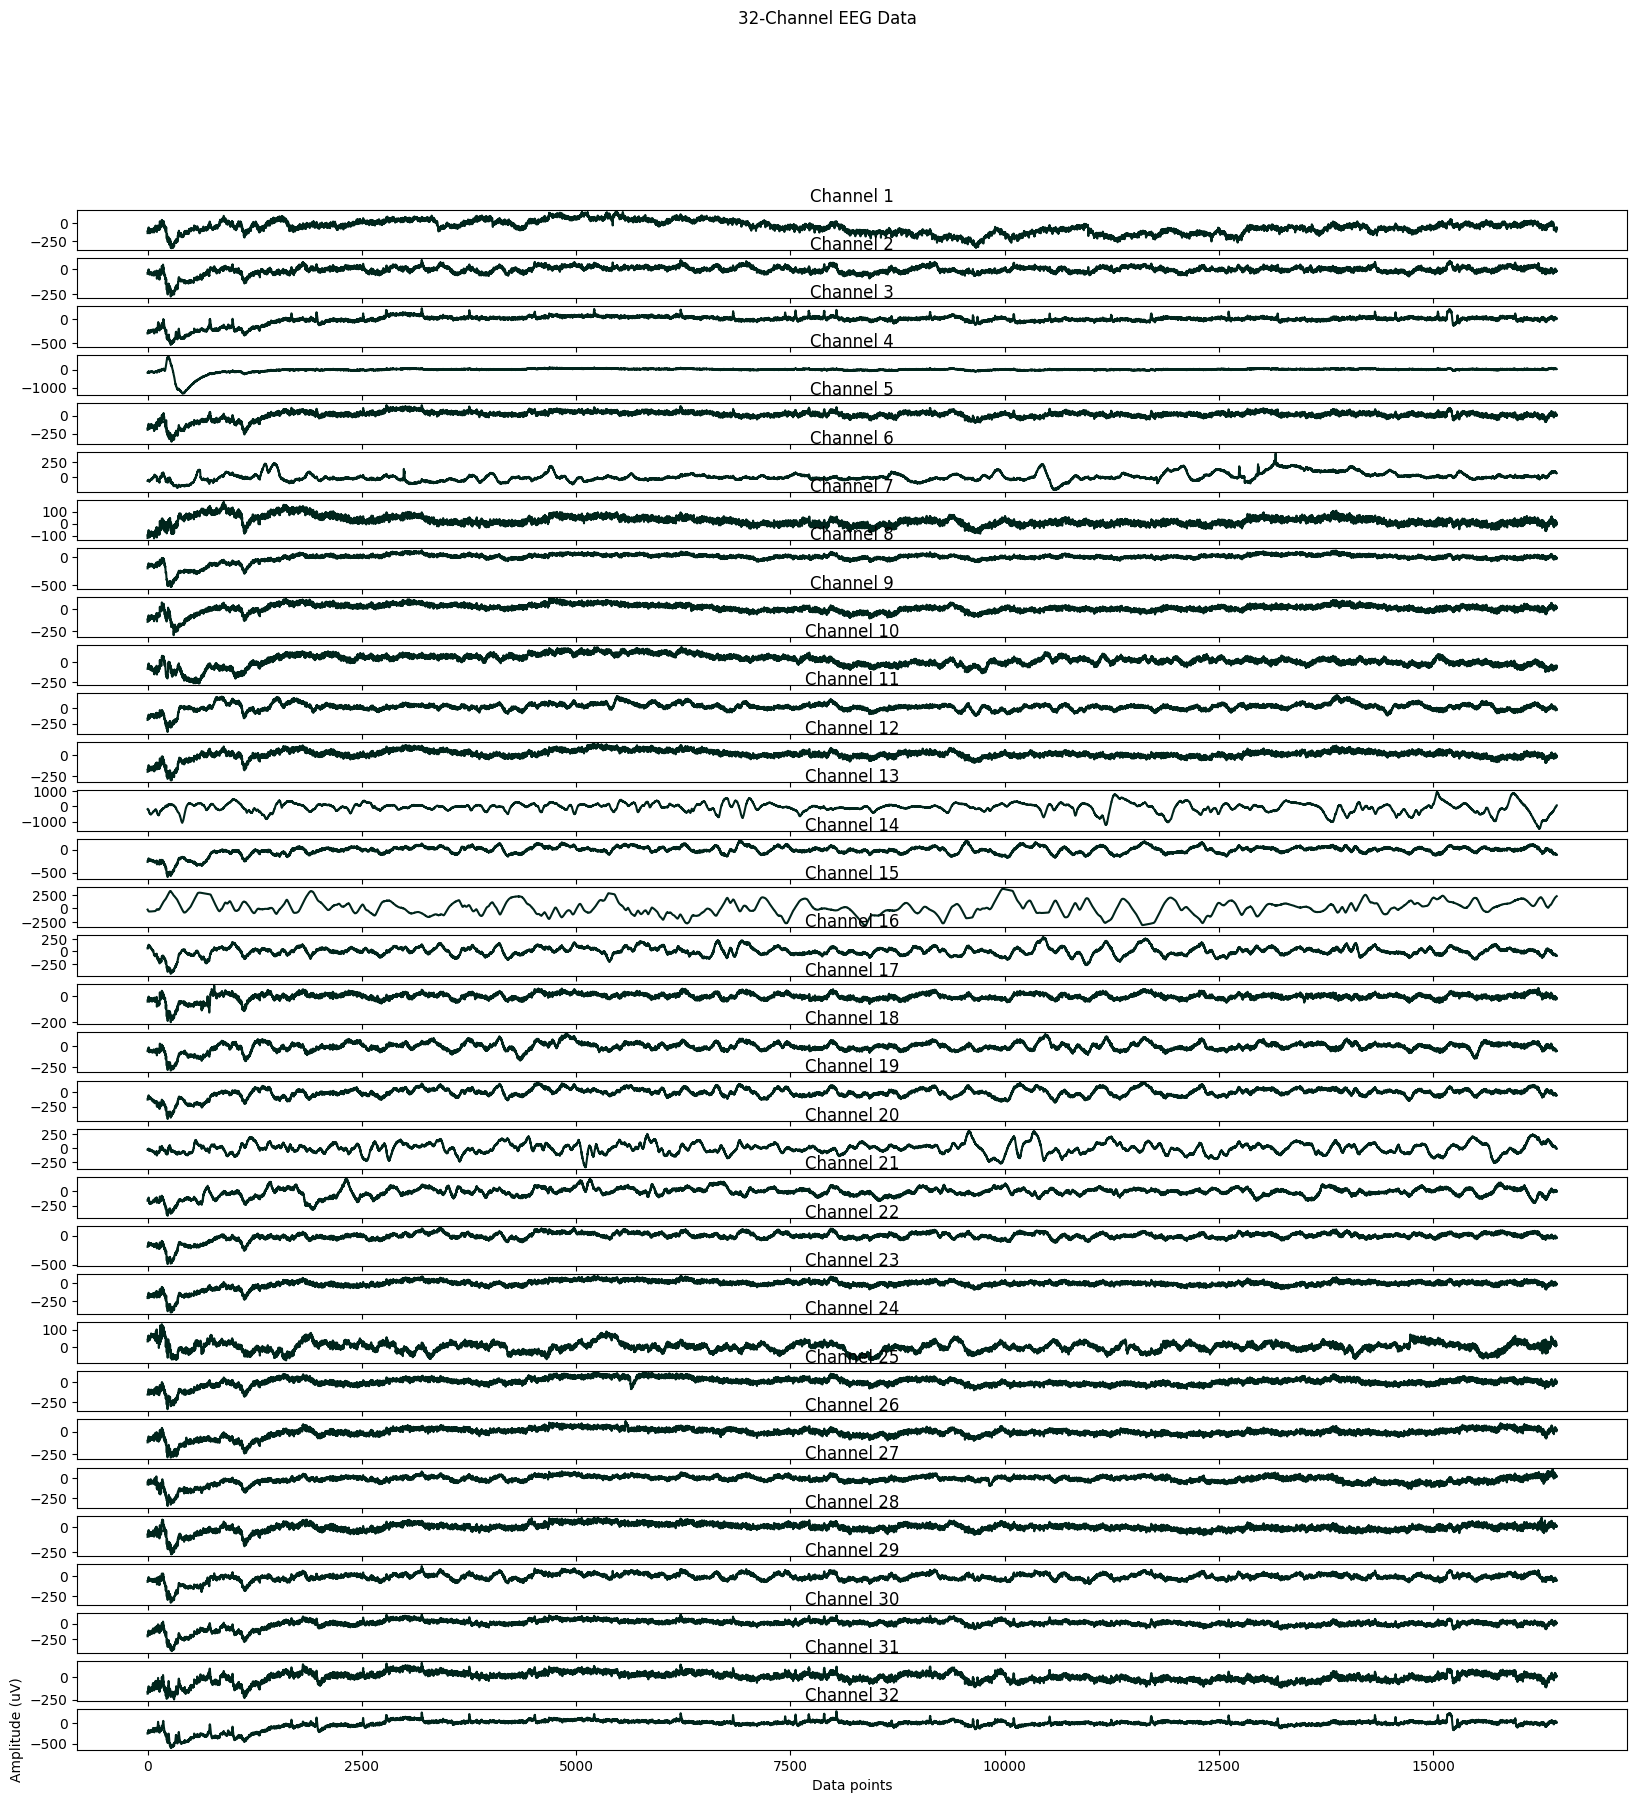

In [15]:
# 创建32通道EEG数据
data_32 = data_c

# 创建32个子图
fig, axs = plt.subplots(32, figsize=(20, 20))
hex_green = '#00251C'
#hex_orange = '#f56842'
# 绘制每个子图
for i in range(32):
    axs[i].plot(data_32.iloc[:,i],hex_green)
    axs[i].set_title(f'Channel {i+1}')


# 添加标题和轴标签
fig.suptitle('32-Channel EEG Data')
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')

# 调整子图之间的间距和边距
#plt.subplots_adjust(hspace=2)
#plt.savefig("raw_eeg.png", dpi=500, bbox_inches='tight')
plt.savefig("channel_eeg.png", dpi=500, bbox_inches='tight')
plt.show()

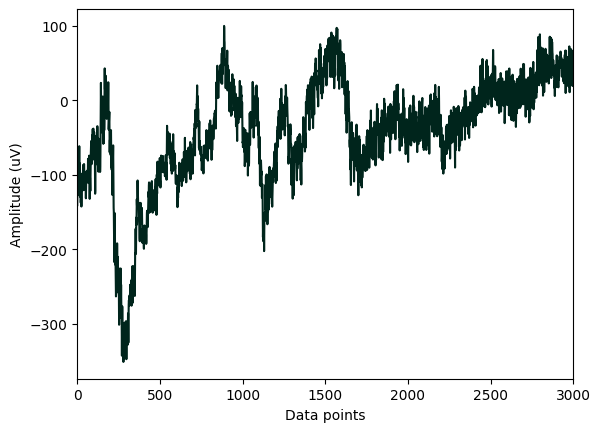

In [13]:
ch_1 = pd.DataFrame(data_32.iloc[:3000,0])
hex_green = '#00251C'
plt.plot(ch_1,hex_green)
plt.xlim(0,3000)
# plt.xticks([0,100,200,300,400,500,600,700,800,900,1000])
# plt.subplots_adjust(left=0.2, right=0.3, top=0.3, bottom=0.2)
# plt.figure(figsize=(100,10))

plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
plt.savefig("raw_eeg_c1.png", dpi=500, bbox_inches='tight')
plt.show()

In [16]:
data = data_c.T
wavelet = pywt.Wavelet('db4')

In [17]:
filtered_data = np.zeros((32, data.shape[1]+1))
for i in range(32):
    coeffs = pywt.wavedec(data.iloc[i, :], wavelet, level=4)
    coeffs[-1] *= 0
#pywt.wavedec函数返回一个有序的系数数组列表，表示信号的多级离散小波分解。其中，列表中的最后一个元素是逼近系数数组，其余元素是细节系数数组
#coeffs = pywt.wavedec(data.iloc[i, :], wavelet, level=4)将数据data.iloc[i,:]进行了4级离散小波分解，并将结果存储在名为coeffs的变量中。然后，
#coeffs[-1] *= 0将逼近系数数组中的所有元素乘以0。
    filtered_data[i, :] = pywt.waverec(coeffs, wavelet)

In [18]:
filtered_data[0,:]

array([-139.93292592, -110.85348102, -107.68710227, ...,  -70.05467227,
        -65.80934703,  -67.0423521 ])

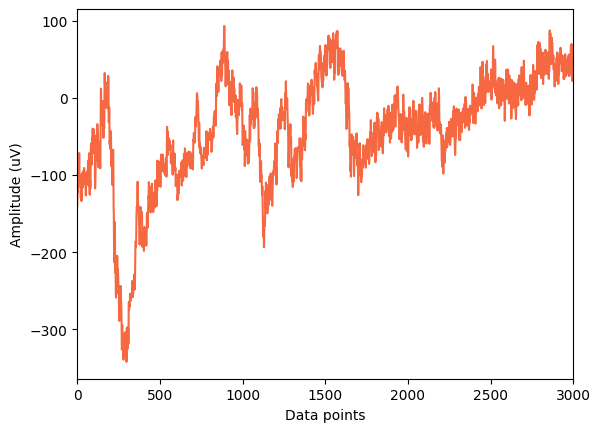

In [19]:
ch_1_f =(pd.DataFrame(filtered_data)).iloc[0,:3000]
hex_orange = '#f56842'
plt.plot(ch_1_f,hex_orange)
plt.xlim(0,3000)
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
# plt.savefig("raw_eeg_1.png", dpi=500, bbox_inches='tight')
plt.show()

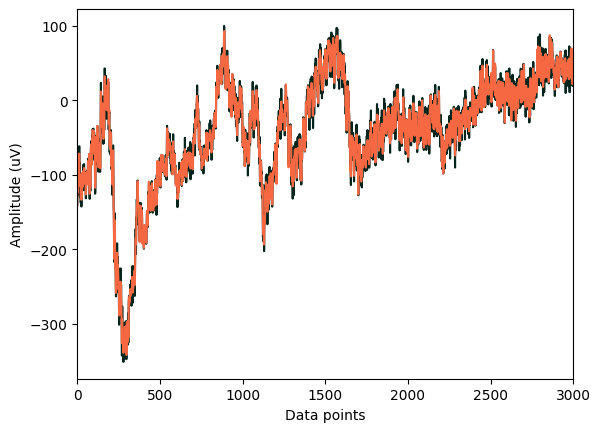

In [21]:
ch_1 = pd.DataFrame(data_32.iloc[:3000,0])
hex_green = '#00251C'
plt.plot(ch_1,hex_green)
plt.xlim(0,3000)
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
# plt.savefig("raw_eeg_1.png", dpi=500, bbox_inches='tight')
ch_1_f =(pd.DataFrame(filtered_data)).iloc[0,:3000]
hex_orange = '#f56842'
plt.plot(ch_1_f,hex_orange)
plt.xlim(0,3000)
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
plt.savefig("contrast.png", dpi=500, bbox_inches='tight')
plt.show()

In [22]:
wavelet = pywt.Wavelet('db4')


In [23]:
coeffs = []
for i in range(32):
    wp = pywt.WaveletPacket(data=filtered_data[i,:], wavelet=wavelet, mode='symmetric', maxlevel=3)
    node = wp['a']
    coeffs.append(node.data)

In [24]:
#小波包系数
coeffs
coeffs_list = pd.DataFrame(coeffs)
coeffs_list
# print(coeffs)
#是一个包含每个通道小波包系数的列表
#其中每个元素是一个一维Numpy数组

,0,1,2,3,4,5,6,7,8,9,...,8215,8216,8217,8218,8219,8220,8221,8222,8223,8224
0,-171.829301,-150.950749,-197.262025,-158.915843,-172.744898,-148.716466,-133.467930,-162.278579,-104.099492,-138.266128,...,-97.022338,-119.509349,-135.725717,-137.629993,-131.278416,-173.370364,-120.406394,-123.323967,-99.986733,-95.139111
1,-49.277284,-43.967862,-64.771327,-48.803251,-49.948801,-42.120553,-27.563440,-36.127624,-6.782027,-34.771164,...,2.157553,-14.331583,-25.711317,-30.608657,-6.837840,-11.994023,-32.584844,-23.503922,-23.520583,-24.962374
2,-412.311825,-390.780105,-426.449610,-395.671646,-411.333177,-394.224871,-375.142691,-381.283026,-332.135901,-363.947579,...,59.482851,24.692648,15.637791,10.711878,30.647830,16.148047,4.855383,17.630458,26.874693,26.861931
3,-211.635690,-193.190044,-232.170692,-200.061250,-211.029960,-195.482212,-172.820723,-191.123203,-141.887909,-180.721669,...,94.502101,63.304348,53.981592,56.563506,85.724585,66.286682,50.215794,60.633974,61.667400,59.259091
4,-263.526958,-240.753163,-276.335604,-244.398860,-264.991322,-236.829716,-214.971997,-225.656003,-176.321176,-206.015898,...,56.146074,18.510854,9.275465,5.342902,29.322025,16.457735,-0.598183,15.170377,14.776910,10.718265
5,-80.239415,-67.940047,-81.072731,-69.141730,-77.325012,-76.990367,-64.206878,-69.726853,-57.187323,-68.275647,...,137.099681,123.390968,117.503741,113.048168,123.177907,111.759469,100.851144,104.038540,100.555892,99.304418
6,-149.438994,-129.051621,-168.255215,-135.515984,-148.345904,-132.845793,-113.564778,-136.174875,-93.045509,-123.651011,...,34.207141,-0.282768,-7.896230,-0.807490,22.187888,7.507165,-4.970780,-0.478710,6.014023,4.819688
7,-247.493033,-236.104931,-281.961042,-246.676015,-249.553682,-230.275143,-200.529074,-217.598220,-168.441244,-195.489373,...,19.815709,-14.362755,-29.823332,-23.726043,7.013450,-17.051353,-30.374282,-23.385219,-17.651045,-18.263660
8,-175.390128,-155.711307,-205.217580,-166.213167,-172.993298,-163.490892,-141.980541,-163.493448,-114.863894,-151.310270,...,54.687915,29.239178,16.543977,25.447884,45.262958,31.745811,17.854727,23.974865,29.821607,29.946714
9,-88.128096,-93.417593,-125.079650,-106.491646,-85.215089,-102.316317,-76.979970,-88.715745,-39.217663,-79.565612,...,-73.423275,-85.149698,-110.782727,-102.331976,-65.274482,-91.150581,-93.295601,-101.282690,-82.561684,-78.186818


In [25]:
#计算每个小波包系数的能量
energy = []
for i in range(32):
    energy.append([np.sum(np.square(coeffs[i]))])

In [26]:
energy

[[175840446.9596475],
 [21991258.677883442],
 [122453872.37491271],
 [349194419.9913168],
 [47111153.55831978],
 [75249164.64826143],
 [30091770.379184578],
 [80583815.61327876],
 [33872383.32967746],
 [80063995.08015174],
 [53685147.118384875],
 [34984427.85149323],
 [1624931200.4555056],
 [134559235.67958337],
 [25455147221.17418],
 [119108742.14832006],
 [10377665.357194073],
 [40574399.77443512],
 [93321634.47894719],
 [133776664.16804396],
 [104102384.79515314],
 [67938692.13072112],
 [46506714.52185036],
 [11172872.431842575],
 [40079237.937400036],
 [35489233.445616744],
 [38611199.85311932],
 [22533302.026588295],
 [33014852.467151612],
 [64403242.70409164],
 [43392420.5850033],
 [184142150.6360818]]

In [27]:
#计算每个小波包系数的能量比
energy_ratio = []
for i in range(32):
    energy_ratio.append([np.sum(np.square(coeffs[i]))/np.sum(np.square(filtered_data[i,:]))])

In [28]:
energy_ratio

[[1.0004653623207704],
 [1.000335746257416],
 [1.0037334898760553],
 [1.0003476589880413],
 [1.0038835239275192],
 [1.0002421633907888],
 [1.0019550042790297],
 [1.0021633707226127],
 [1.0025045948453568],
 [1.0003644213784697],
 [1.0030749613704704],
 [1.004851735593548],
 [1.0001081510660388],
 [1.0025412839740928],
 [1.0001205500394799],
 [1.0002668262274539],
 [1.0005793346307816],
 [1.0004048239136425],
 [1.0007485286933633],
 [1.0000256685621738],
 [1.001179158269517],
 [1.0025575334530035],
 [1.0042979704096597],
 [1.0009452503917193],
 [1.0030435787308098],
 [1.0016493558598347],
 [1.0005044937529537],
 [1.0015227545770287],
 [1.0005541030569118],
 [1.003054833632846],
 [1.0035182428567824],
 [1.001739883120161]]

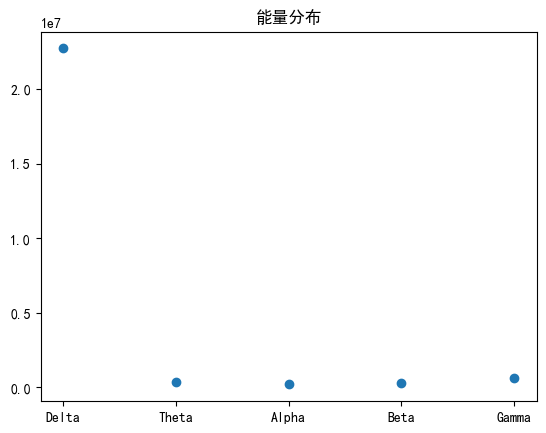

In [39]:
iter_freqs = [
    {'name': 'Delta', 'fmin': 0, 'fmax': 4},
    {'name': 'Theta', 'fmin': 4, 'fmax': 8},
    {'name': 'Alpha', 'fmin': 8, 'fmax': 13},
    {'name': 'Beta', 'fmin': 13, 'fmax': 35},
    {'name': 'Gamma', 'fmin': 35, 'fmax': 100}
    ]

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
mne.set_log_level(False)

maxlevel = 8
fs = 128
wp = pywt.WaveletPacket(data=filtered_data[1,:], wavelet='db4', mode='symmetric', maxlevel=8)

freqTree = [node.path for node in wp.get_level(8, 'freq')]

  # 计算maxlevel最小频段的带宽
freqBand = fs / (2 ** maxlevel)
    # 定义能量数组
energy = []
for iter in range(len(iter_freqs)):
        iterEnergy = 0.0
        for i in range(len(freqTree)):
            # 第i个频段的最小频率
            bandMin = i * freqBand
            # 第i个频段的最大频率
            bandMax = bandMin + freqBand
            # 判断第i个频段是否在要分析的范围内
            if (iter_freqs[iter]['fmin'] <= bandMin and iter_freqs[iter]['fmax'] >= bandMax):
                # 计算对应频段的累加和
                iterEnergy += pow(np.linalg.norm(wp[freqTree[i]].data, ord=None), 2)
        # 保存四个频段对应的能量和
        energy.append(iterEnergy)
hex_blue = '#002fc6'
plt.plot([xLabel['name'] for xLabel in iter_freqs], energy, lw=0, marker='o',)
plt.title('能量分布')
plt.savefig("energy_distribution.png", dpi=500, bbox_inches='tight')
plt.show()

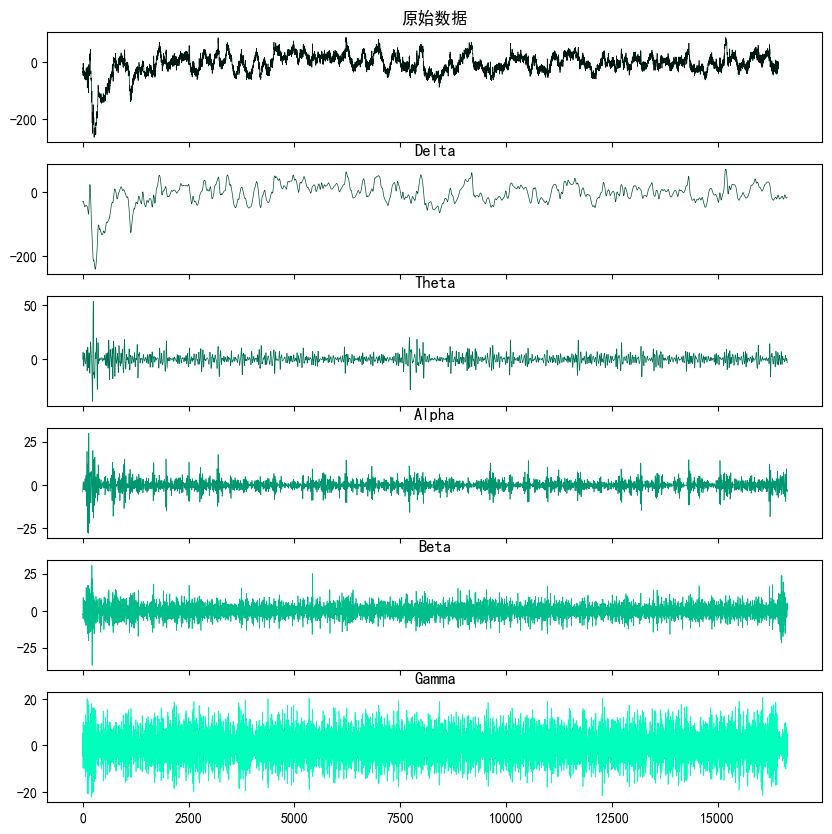

In [35]:
wp = pywt.WaveletPacket(data=filtered_data[1,:], wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
# 频谱由低到高的对应关系，这里需要注意小波变换的频带排列默认并不是顺序排列，所以这里需要使用’freq‘排序。
freqTree = [node.path for node in wp.get_level(maxlevel, 'freq')]
# 计算maxlevel最小频段的带宽
freqBand = fs/(2**maxlevel)
#######################根据实际情况计算频谱对应关系，这里要注意系数的顺序
# 绘图显示
fig, axes = plt.subplots(len(iter_freqs)+1, 1, figsize=(10, 10), sharex=True, sharey=False)
# 绘制原始数据
axes[0].plot(filtered_data[1,:], color='#001810', lw=0.5)
axes[0].set_title('原始数据')
for iter in range(len(iter_freqs)):
    # 构造空的小波包
    new_wp = pywt.WaveletPacket(data=None, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
    for i in range(len(freqTree)):
        # 第i个频段的最小频率
        bandMin = i * freqBand
        # 第i个频段的最大频率
        bandMax = bandMin + freqBand
        # 判断第i个频段是否在要分析的范围内
        if (iter_freqs[iter]['fmin']<=bandMin and iter_freqs[iter]['fmax']>= bandMax):
            # 给新构造的小波包参数赋值
            new_wp[freqTree[i]] = wp[freqTree[i]].data
    # 绘制对应频率的数据
    hex_greens = ['#004b38','#007154','#009770','#00bd8c','#00ffbc']
    axes[iter+1].plot(new_wp.reconstruct(update=True),hex_greens[iter], lw=0.5)
        # 设置图名
    axes[iter+1].set_title(iter_freqs[iter]['name'])
    plt.savefig("eeg_wavelet.png", dpi=500, bbox_inches='tight')
plt.show()

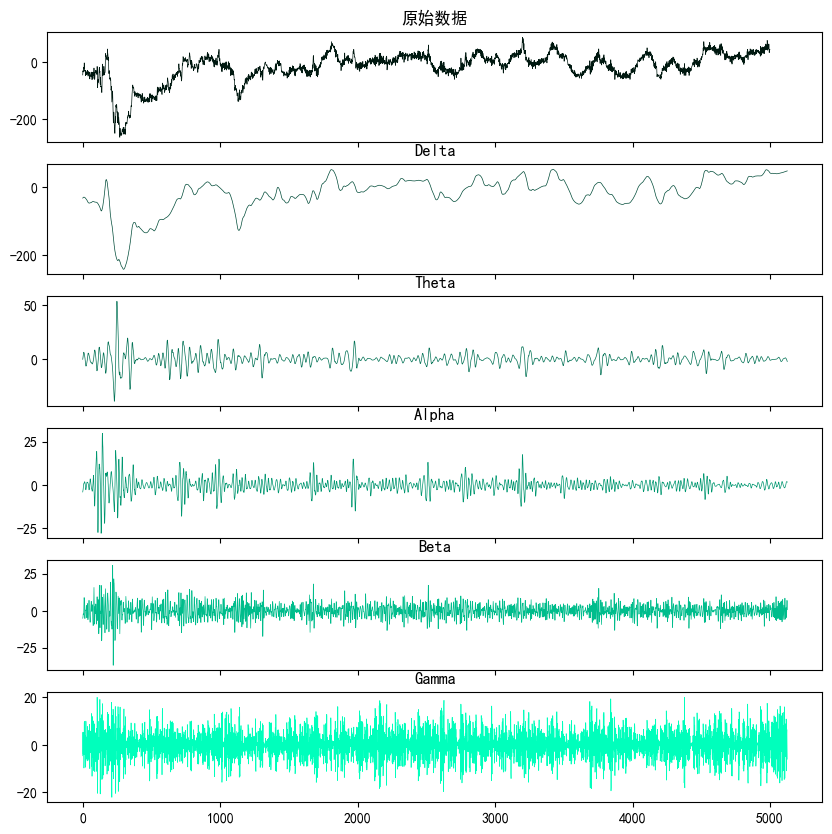

In [37]:
wp = pywt.WaveletPacket(data=filtered_data[1,:5000], wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
# 频谱由低到高的对应关系，这里需要注意小波变换的频带排列默认并不是顺序排列，所以这里需要使用’freq‘排序。
freqTree = [node.path for node in wp.get_level(maxlevel, 'freq')]
# 计算maxlevel最小频段的带宽
freqBand = fs/(2**maxlevel)
#######################根据实际情况计算频谱对应关系，这里要注意系数的顺序
# 绘图显示
fig, axes = plt.subplots(len(iter_freqs)+1, 1, figsize=(10, 10), sharex=True, sharey=False)
# 绘制原始数据
axes[0].plot(filtered_data[1,:5000], color='#001810', lw=0.5)
axes[0].set_title('原始数据')
for iter in range(len(iter_freqs)):
    # 构造空的小波包
    new_wp = pywt.WaveletPacket(data=None, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
    for i in range(len(freqTree)):
        # 第i个频段的最小频率
        bandMin = i * freqBand
        # 第i个频段的最大频率
        bandMax = bandMin + freqBand
        # 判断第i个频段是否在要分析的范围内
        if (iter_freqs[iter]['fmin']<=bandMin and iter_freqs[iter]['fmax']>= bandMax):
            # 给新构造的小波包参数赋值
            new_wp[freqTree[i]] = wp[freqTree[i]].data
    # 绘制对应频率的数据
    hex_greens = ['#004b38','#007154','#009770','#00bd8c','#00ffbc']
    axes[iter+1].plot(new_wp.reconstruct(update=True),hex_greens[iter], lw=0.5)
        # 设置图名
    axes[iter+1].set_title(iter_freqs[iter]['name'])
    plt.savefig("eeg_wavelet_short.png", dpi=500, bbox_inches='tight')
plt.show()